# Assignment 2: Scale-Space Blob Detection

### The goal of this assignment is to implement a Laplacian blob detector

Noel Mrowiec
10/1/2024
mrowiec3

In [267]:
# Libraries you will find useful
import numpy as np
import scipy 
import skimage
import matplotlib.pyplot as plt
import os
from PIL import Image, ImageOps 

In [268]:
# Function to globally normalize a 2D array to the range [0, 1] 
def normalize(data):
    return (data - data.min()) / (data.max() - data.min())

In [269]:

# load each image 
dir_path = "images/"
images = []     #color images
filenames = []
for filename in os.listdir(dir_path):
    if filename.endswith('.jpg'):
        filenames.append(filename)
        img_path = os.path.join(dir_path, filename)
        img = Image.open(img_path)
        #img.show()  # This will display the image
        
        # convert images to grayscale
        img_gs = ImageOps.grayscale(img) 
        #img_gs.show()
        img_gs = np.array(img_gs).astype(float)
        img_gs = normalize(img_gs)
        images.append(img_gs)
        

print(f"Loaded {len(images)} images")

Loaded 4 images


In [270]:
def get_sigma(k):
    return (2 ** k)

In [288]:
import numpy as np

# Example array
array = np.array([.3, .1, .7, 0, 0])

# Threshold value
k = .4

# Set values below k to zero
array = np.where(array < k, 0, array)
print(array)


[0.  0.  0.7 0.  0. ]


In [271]:

# for applying the Laplacian filter
from scipy.ndimage.filters import gaussian_laplace
def laplacian_gaussian(image, sigmas):
    scale_space = np.empty((image.shape[0],image.shape[1], len(sigmas)))

    for k, sigma in enumerate(sigmas):
        #sigma = get_sigma(k)
        lap_gaus = gaussian_laplace(image, sigma, mode='nearest') 
        scale_norm_LoG = (sigma ** 2) * lap_gaus                                                      #scale normalized
        scale_space[:,:,k] = scale_norm_LoG

    return scale_space

/tmp/ipykernel_161319/2249926286.py:2: DeprecationWarning: Please import `gaussian_laplace` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_laplace


In [272]:
from scipy.ndimage.filters import rank_filter

def non_max_suppression(array, threshold):
    local_max = rank_filter(array, rank=-1, size=5)

    # Only keep the pixels that are local maxima
    result = np.where(array == local_max, array, 0)

    #suppress any result less than threshold
    result = np.where(result < k, 0, array)
    return result

/tmp/ipykernel_161319/3824668257.py:1: DeprecationWarning: Please import `rank_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import rank_filter


In [ ]:
#TODO remove

# def get_local_peak_coord()

# lm = feature.peak_local_max(stacked_images, threshold_abs=10, footprint=np.ones((3, 3, 3)), threshold_rel=10, exclude_border=True)

In [273]:
def get_xy_coordinates(image):
    # Get the coordinates of non-zero values
    non_zero_coords = np.nonzero(image)
    
    return non_zero_coords[0], non_zero_coords[1]


In [274]:
# constant
sqt_2 = np.sqrt(2)

In [275]:
import pandas as pd

In [289]:
#N = 10
SIGMAS = [1,2,3,4,5,6,7,8,9,10,11]
x_coordinates = np.empty(0)
y_coordinates = np.empty(0)
radii = np.empty(0)

for image in images[:1]:
    lap_of_gauss = laplacian_gaussian(image, SIGMAS)
    threshold = np.absolute(lap_of_gauss).mean() * 0.75

    for k, sigma in enumerate(SIGMAS):
        blob_map = non_max_suppression(lap_of_gauss[:,:, k], threshold)

        # Convert to Pandas DataFrame
        df = pd.DataFrame(blob_map)

        print(df.describe())


        h_pos, w_pos = get_xy_coordinates(blob_map)

        x_coordinates = np.append(x_coordinates, w_pos)
        y_coordinates = np.append(y_coordinates, h_pos)

        radii = np.append(radii, np.full(x_coordinates.shape[0], sigma * sqt_2))       # TODO divide by sigma squared?

TypeError: non_max_suppression() takes 1 positional argument but 2 were given

In [277]:





# filtering the image (two implementations)
# one that increases filter size, and one that downsamples the image
# For timing, use time.time()



# nonmaximum suppression in scale space
# you may find functions scipy.ndimage.filters.rank_filter or scipy.ndimage.filters.generic_filter useful



# To display the detected regions as circle
from matplotlib.patches import Circle
def show_all_circles(image, cx, cy, rad, color='r'):
    """
    image: numpy array, representing the grayscsale image
    cx, cy: numpy arrays or lists, centers of the detected blobs
    rad: numpy array or list, radius of the detected blobs
    """
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.imshow(image, cmap='gray')
    for x, y, r in zip(cx, cy, rad):
        circ = Circle((x, y), r, color=color, fill=False)
        ax.add_patch(circ)

    plt.title('%i circles' % len(cy))

    plt.show()

[ 1.41421356  1.41421356  1.41421356 ... 15.55634919 15.55634919
 15.55634919]
492.0
355.0
image size (356, 493)


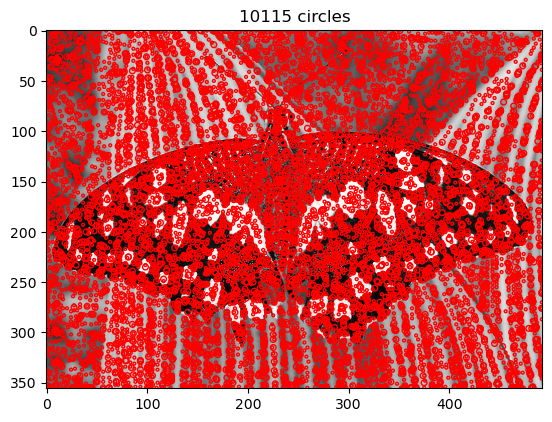

In [279]:
#np.set_printoptions(threshold=np.inf)

# print(x_coordinates)
# print(y_coordinates)
print(radii)

print(x_coordinates.max())
print(y_coordinates.max())

print(f"image size {images[0].shape}")
show_all_circles(images[0], x_coordinates, y_coordinates, radii)
#show_all_circles(images[0], [55,33,88,10], [76,350,12,100], [5,7,1,2])

In [280]:
import cv2
import numpy as np

# Load your image
image = cv2.imread('images/butterfly.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(image, None)

# Print the radius (scale) of each keypoint
for kp in keypoints:
    print(f"Keypoint radius: {kp.size}")

print(f"number of keypoints {len(keypoints)}")


Keypoint radius: 7.039892673492432
Keypoint radius: 7.039892673492432
Keypoint radius: 9.89643383026123
Keypoint radius: 9.89643383026123
Keypoint radius: 9.936521530151367
Keypoint radius: 8.38396167755127
Keypoint radius: 11.6674165725708
Keypoint radius: 11.6674165725708
Keypoint radius: 10.20260238647461
Keypoint radius: 10.20260238647461
Keypoint radius: 5.025646686553955
Keypoint radius: 5.977290153503418
Keypoint radius: 8.488493919372559
Keypoint radius: 5.123463153839111
Keypoint radius: 5.123463153839111
Keypoint radius: 8.046290397644043
Keypoint radius: 9.387319564819336
Keypoint radius: 9.387319564819336
Keypoint radius: 7.613601207733154
Keypoint radius: 17.341140747070312
Keypoint radius: 14.746243476867676
Keypoint radius: 9.3104887008667
Keypoint radius: 14.199297904968262
Keypoint radius: 6.085587024688721
Keypoint radius: 6.085587024688721
Keypoint radius: 7.732848644256592
Keypoint radius: 9.687704086303711
Keypoint radius: 5.872124195098877
Keypoint radius: 9.58001